
# 28/03/2025


# Neural Network


Epoch 0, Loss: 0.318245
Epoch 1000, Loss: 0.205697
Epoch 2000, Loss: 0.141854
Epoch 3000, Loss: 0.058651
Epoch 4000, Loss: 0.020112
Epoch 5000, Loss: 0.009992
Epoch 6000, Loss: 0.006270
Epoch 7000, Loss: 0.004461
Epoch 8000, Loss: 0.003421
Epoch 9000, Loss: 0.002756


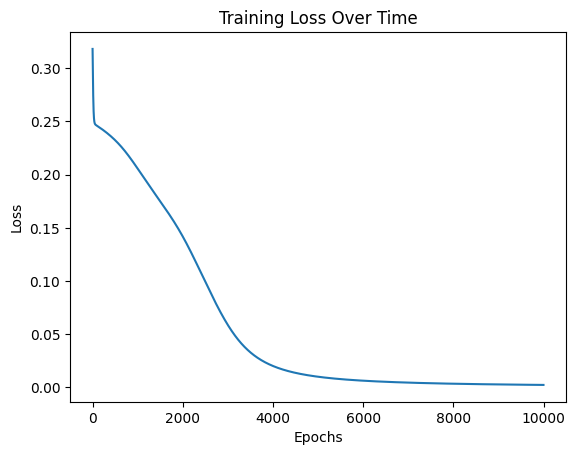

Final Predictions:
 [[0.02515318]
 [0.95264015]
 [0.95122762]
 [0.06271949]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Input (X) and Output (Y)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR inputs
Y = np.array([[0], [1], [1], [0]])  # Expected output

# Initialize Weights and Biases
np.random.seed(42)
W1 = np.random.randn(2, 3)  # Input to hidden weights (2x3)
b1 = np.zeros((1, 3))       # Bias for hidden layer
W2 = np.random.randn(3, 1)  # Hidden to output weights (3x1)
b2 = np.zeros((1, 1))       # Bias for output layer

# Training Parameters
epochs = 10000
learning_rate = 0.1
losses = []

# Training Loop
for epoch in range(epochs):
    # Forward Propagation
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    # Compute Loss (Mean Squared Error)
    loss = np.mean((Y - A2) ** 2)
    losses.append(loss)

    # Backpropagation
    dZ2 = (A2 - Y) * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Update Weights & Biases
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.6f}")

# Plot the loss curve
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.show()

# Testing
predictions = sigmoid(np.dot(sigmoid(np.dot(X, W1) + b1), W2) + b2)
print("Final Predictions:\n", predictions)


# 2D based Feature Alignment

Epoch 0, Loss: 52.095264
Epoch 50, Loss: 0.567628
Epoch 100, Loss: 0.188472
Epoch 150, Loss: 0.083390
Epoch 200, Loss: 0.044649
Epoch 250, Loss: 0.023382
Epoch 300, Loss: 0.012783
Epoch 350, Loss: 0.007661
Epoch 400, Loss: 0.005107
Epoch 450, Loss: 0.003731


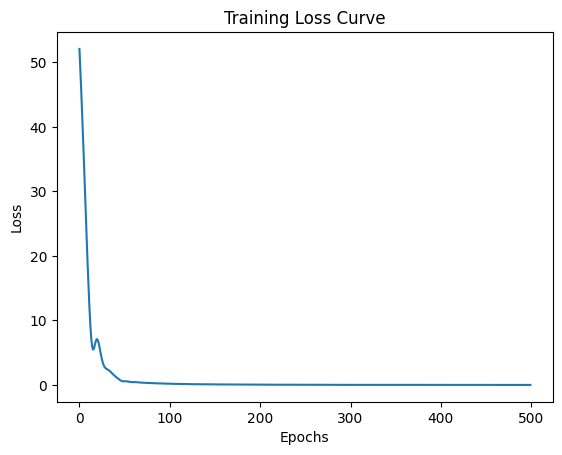

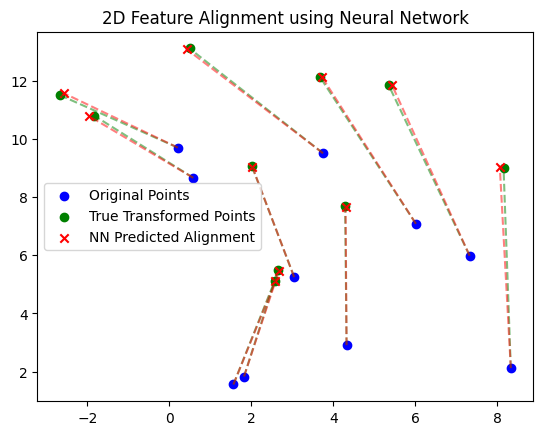

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate synthetic 2D feature points (10 points)
np.random.seed(42)
num_points = 10
X = np.random.rand(num_points, 2) * 10  # Original feature points

# Define a known transformation (rotation + translation)
theta = np.pi / 6  # 30-degree rotation
R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
T = np.array([2, 3])  # Translation

Y = (X @ R.T) + T  # Transformed points

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32)

# Define a simple Neural Network for learning feature alignment
class FeatureAlignmentNN(nn.Module):
    def __init__(self):
        super(FeatureAlignmentNN, self).__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 2)  # Output transformed 2D points

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model, loss function, and optimizer
model = FeatureAlignmentNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 500
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    Y_pred = model(X_tensor)  # Forward pass
    loss = criterion(Y_pred, Y_tensor)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights
    losses.append(loss.item())
    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}")

# Plot loss curve
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

# Predict transformation
Y_aligned = model(X_tensor).detach().numpy()

# Visualization of alignment
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Original Points')
plt.scatter(Y[:, 0], Y[:, 1], color='green', label='True Transformed Points')
plt.scatter(Y_aligned[:, 0], Y_aligned[:, 1], color='red', label='NN Predicted Alignment', marker='x')

for i in range(num_points):
    plt.plot([X[i, 0], Y[i, 0]], [X[i, 1], Y[i, 1]], 'g--', alpha=0.5)  # True transformation
    plt.plot([X[i, 0], Y_aligned[i, 0]], [X[i, 1], Y_aligned[i, 1]], 'r--', alpha=0.5)  # Learned transformation

plt.legend()
plt.title('2D Feature Alignment using Neural Network')
plt.show()


Epoch 0, Loss: 49.249470
Epoch 50, Loss: 3.112821
Epoch 100, Loss: 1.132834
Epoch 150, Loss: 0.426265
Epoch 200, Loss: 0.326946
Epoch 250, Loss: 0.301126
Epoch 300, Loss: 0.281380
Epoch 350, Loss: 0.263241
Epoch 400, Loss: 0.246213
Epoch 450, Loss: 0.230312


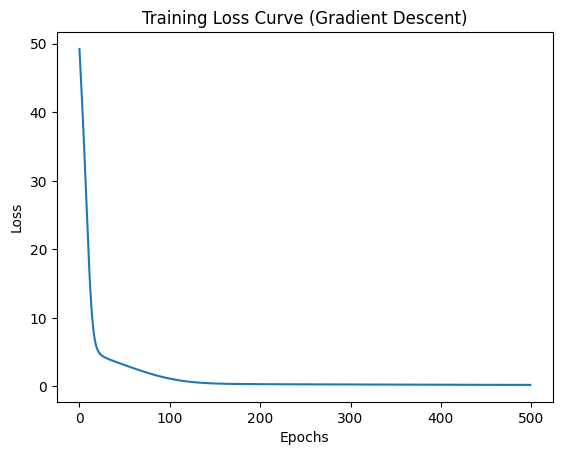

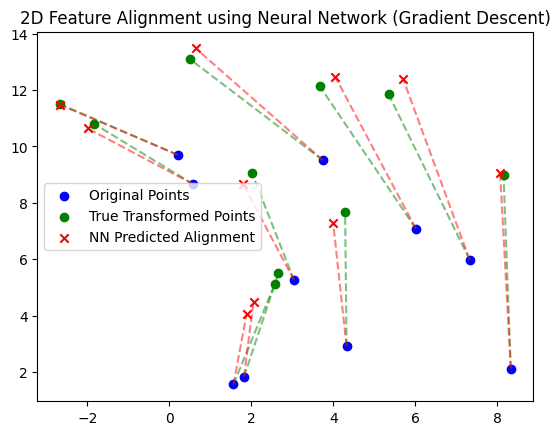

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Generate synthetic 2D feature points (10 points)
np.random.seed(42)
num_points = 10
X = np.random.rand(num_points, 2) * 10  # Original feature points

# Define a known transformation (rotation + translation)
theta = np.pi / 6  # 30-degree rotation
R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
T = np.array([2, 3])  # Translation

Y = (X @ R.T) + T  # Transformed points

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32)

# Define Neural Network Model
class FeatureAlignmentNN(nn.Module):
    def __init__(self):
        super(FeatureAlignmentNN, self).__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 2)  # Output transformed 2D points

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model
model = FeatureAlignmentNN()
criterion = nn.MSELoss()

# **Using Gradient Descent as Optimizer**
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
epochs = 500
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    Y_pred = model(X_tensor)  # Forward pass
    loss = criterion(Y_pred, Y_tensor)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights with SGD
    losses.append(loss.item())

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}")

# Plot loss curve
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve (Gradient Descent)')
plt.show()

# Predict transformation
Y_aligned = model(X_tensor).detach().numpy()

# Visualization
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Original Points')
plt.scatter(Y[:, 0], Y[:, 1], color='green', label='True Transformed Points')
plt.scatter(Y_aligned[:, 0], Y_aligned[:, 1], color='red', label='NN Predicted Alignment', marker='x')

for i in range(num_points):
    plt.plot([X[i, 0], Y[i, 0]], [X[i, 1], Y[i, 1]], 'g--', alpha=0.5)  # True transformation
    plt.plot([X[i, 0], Y_aligned[i, 0]], [X[i, 1], Y_aligned[i, 1]], 'r--', alpha=0.5)  # Learned transformation

plt.legend()
plt.title('2D Feature Alignment using Neural Network (Gradient Descent)')
plt.show()


# Backpropagation

In [ ]:
import numpy as np

# Activation function (Sigmoid) and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)  # derivative of sigmoid

# Training data (X: input, Y: actual output)
X = np.array([[0,0], [0,1], [1,0], [1,1]])  # XOR inputs
Y = np.array([[0], [1], [1], [0]])          # XOR outputs

# Initialize weights randomly
np.random.seed(42)
W1 = np.random.rand(2, 2)  # 2 input → 2 hidden
W2 = np.random.rand(2, 1)  # 2 hidden → 1 output
learning_rate = 0.5

# Train for 10,000 iterations
for i in range(10000):
    # Forward Pass
    hidden_input = np.dot(X, W1)
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, W2)
    final_output = sigmoid(final_input)

    # Compute Error
    error = Y - final_output

    # Backpropagation
    d_output = error * sigmoid_derivative(final_output)  # Output layer gradient
    d_hidden = d_output.dot(W2.T) * sigmoid_derivative(hidden_output)  # Hidden layer gradient

    # Update Weights
    W2 += hidden_output.T.dot(d_output) * learning_rate
    W1 += X.T.dot(d_hidden) * learning_rate

# Output Predictions
print("Final Predictions:")
print(final_output)


Final Predictions:
[[0.05432736]
 [0.89823995]
 [0.89824011]
 [0.13514441]]


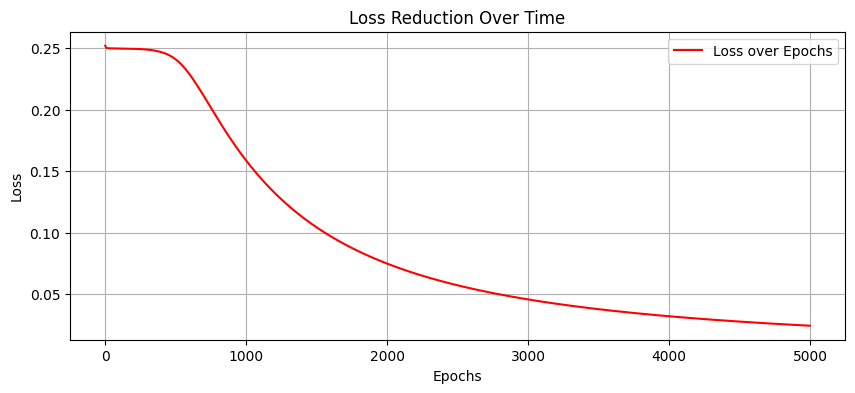

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid Activation Function and Derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training Data (XOR problem)
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [1], [1], [0]])

# Initialize Weights Randomly
np.random.seed(42)
W1 = np.random.rand(2, 2)  # Input to Hidden
W2 = np.random.rand(2, 1)  # Hidden to Output
learning_rate = 0.5

losses = []  # Store loss values
epochs = 5000

for i in range(epochs):
    # Forward Propagation
    hidden_input = np.dot(X, W1)
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, W2)
    final_output = sigmoid(final_input)

    # Compute Loss
    error = Y - final_output
    loss = np.mean(np.square(error))  # Mean Squared Error
    losses.append(loss)

    # Backpropagation
    d_output = error * sigmoid_derivative(final_output)
    d_hidden = d_output.dot(W2.T) * sigmoid_derivative(hidden_output)

    # Update Weights
    W2 += hidden_output.T.dot(d_output) * learning_rate
    W1 += X.T.dot(d_hidden) * learning_rate

# --- Visualization of Loss Reduction ---
plt.figure(figsize=(10, 4))
plt.plot(losses, label="Loss over Epochs", color='r')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Reduction Over Time")
plt.legend()
plt.grid()
plt.show()


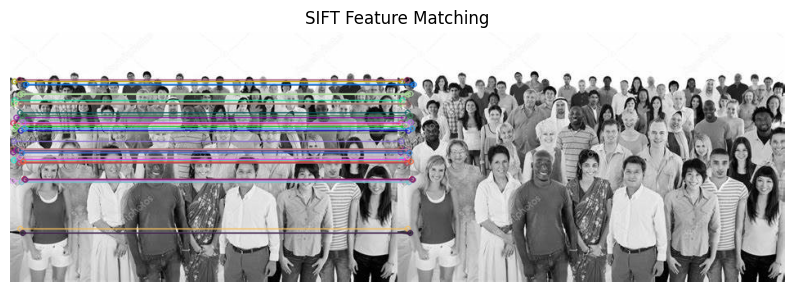

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images (convert to grayscale)
img1 = cv2.imread("/content/drive/MyDrive/faces.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("/content/drive/MyDrive/faces.jpg", cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

# Use Brute-Force Matcher with Euclidean distance
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance (lower distance = better match)
matches = sorted(matches, key=lambda x: x.distance)

# Draw top matches
matched_img = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Show the matched image
plt.figure(figsize=(10,5))
plt.imshow(matched_img, cmap="gray")
plt.title("SIFT Feature Matching")
plt.axis("off")
plt.show()


# feature detection

SIFT

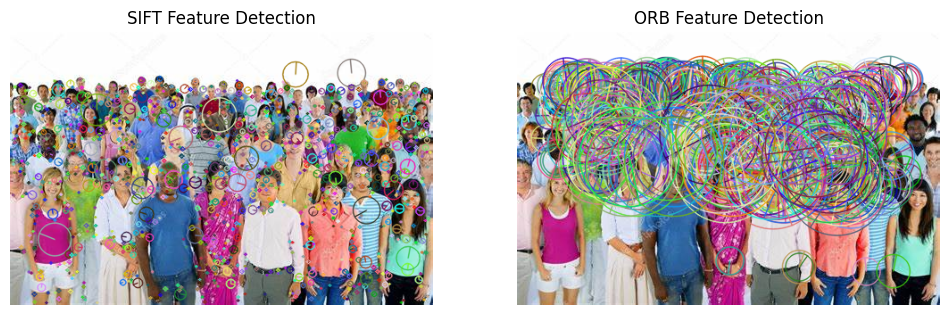

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("/content/drive/MyDrive/faces.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize feature detectors
sift = cv2.SIFT_create()
orb = cv2.ORB_create()

# Detect keypoints
sift_keypoints = sift.detect(gray, None)
orb_keypoints = orb.detect(gray, None)

# Draw keypoints on the image
sift_img = cv2.drawKeypoints(image, sift_keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
orb_img = cv2.drawKeypoints(image, orb_keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display images
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(cv2.cvtColor(sift_img, cv2.COLOR_BGR2RGB))
ax[0].set_title("SIFT Feature Detection")
ax[0].axis("off")

ax[1].imshow(cv2.cvtColor(orb_img, cv2.COLOR_BGR2RGB))
ax[1].set_title("ORB Feature Detection")
ax[1].axis("off")

plt.show()


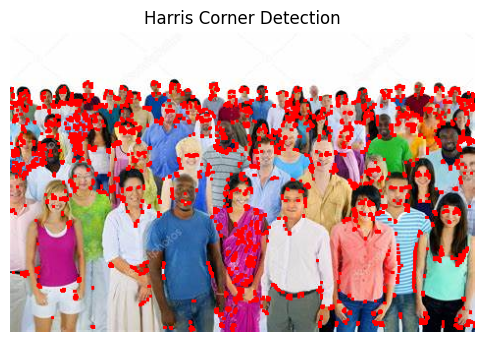

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("/content/drive/MyDrive/faces.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Harris Corner Detection
gray = np.float32(gray)
harris_response = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Dilate the detected corners for visualization
harris_response = cv2.dilate(harris_response, None)

# Mark corners in the original image
image[harris_response > 0.01 * harris_response.max()] = [0, 0, 255]  # Red color for corners

# Display the image with detected corners
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Harris Corner Detection")
plt.axis("off")
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("/content/drive/MyDrive/faces.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize SURF (Requires OpenCV contrib)
surf = cv2.xfeatures2d.SURF_create(hessianThreshold=400)

# Detect keypoints and compute descriptors
keypoints, descriptors = surf.detectAndCompute(gray, None)

# Draw keypoints on the image
surf_img = cv2.drawKeypoints(image, keypoints, None, (0, 255, 0), 4)

# Display the image
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(surf_img, cv2.COLOR_BGR2RGB))
plt.title("SURF Feature Detection")
plt.axis("off")
plt.show()


AttributeError: module 'cv2.xfeatures2d' has no attribute 'SURF_create'